# 1.DATASET & LIBRARIES

Table : Employee Salaries For Different Job Roles

## 1.1 Download Dataset

In [151]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("inductiveanks/employee-salaries-for-different-job-roles")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/inductiveanks/employee-salaries-for-different-job-roles/versions/1


The dataset is from Kaggle

## 1.2 About Dataset

Welcome to the Employee Salaries for Different Job Roles Dataset! This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

***Content :***

The dataset contains the following fields :

- **work_year :** The year of employment.
- **experience_level :** The experience level of the employee (e.g., entry-level, mid-level, senior).
- **employment_type :** The type of employment (e.g., full-time, part-time, contract).
- **job_title :** The job title or position of the employee within the company.
- **salary :** The salary amount in the local currency.
- **salary_currency :** The currency in which the salary is denoted.
- **salary_in_usd :** The equivalent salary amount in USD (United States Dollars).
- **employee_residence :** The location of the employee's residence.
- **remote_ratio :** The percentage of remote work allowed for the position.
- **company_location :** The location of the company.
- **company_size :** The size of the company (e.g., small, medium, large).

***Usage :***

This dataset can be utilized for various purposes, including but not limited to :

Analyzing salary trends across different job titles and experience levels.
Investigating the impact of remote work on compensation.
Comparing salary levels between full-time and part-time employment.
Understanding the correlation between company size and employee salaries.
Predictive analysis for forecasting salaries based on experience and job roles.

## 1.3 Libraries

In [152]:
# Importing Libraries
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [153]:
# URL Google Sheets CSV
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRvaD3Ra8fsZ8GluZgx-aX1t4AsdH8hj0GNgMCn19yQYRl9JS5Bo1bi8lprB1sYdtA7-L5CuX4eWVhI/pub?output=csv"

df = pd.read_csv(url)
print(df.head())  # Show firts 5 rows

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [154]:
df.shape

(607, 12)

In [155]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


Thre are 607 rows by 12 columns

In [156]:
from google.colab import sheets
sheets = sheets.InteractiveSheet (df=df)

https://docs.google.com/spreadsheets/d/1LYVjH1BLQQpGcQzG8na__VkOUO1OqL7_qheklzB8kBY#gid=0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are 0 rows of null data

In [158]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


# 2.DATA CLEANING

## 2.1 Check Typo Value

In [159]:
print("Typos in column 'job_title':")
for value in df['job_title']:
    if not re.match(r'^[A-Za-z0-9\s]+$', value):
        print(value)

Typos in column 'job_title':


There is no typo value

In [160]:
# Perecentage of null data of each column
round(df.isnull().sum()/len(df*100),2)

,0
Unnamed: 0,0.0
work_year,0.0
experience_level,0.0
employment_type,0.0
job_title,0.0
salary,0.0
salary_currency,0.0
salary_in_usd,0.0
employee_residence,0.0
remote_ratio,0.0


## 2.2 Check Missing Values

<Axes: >

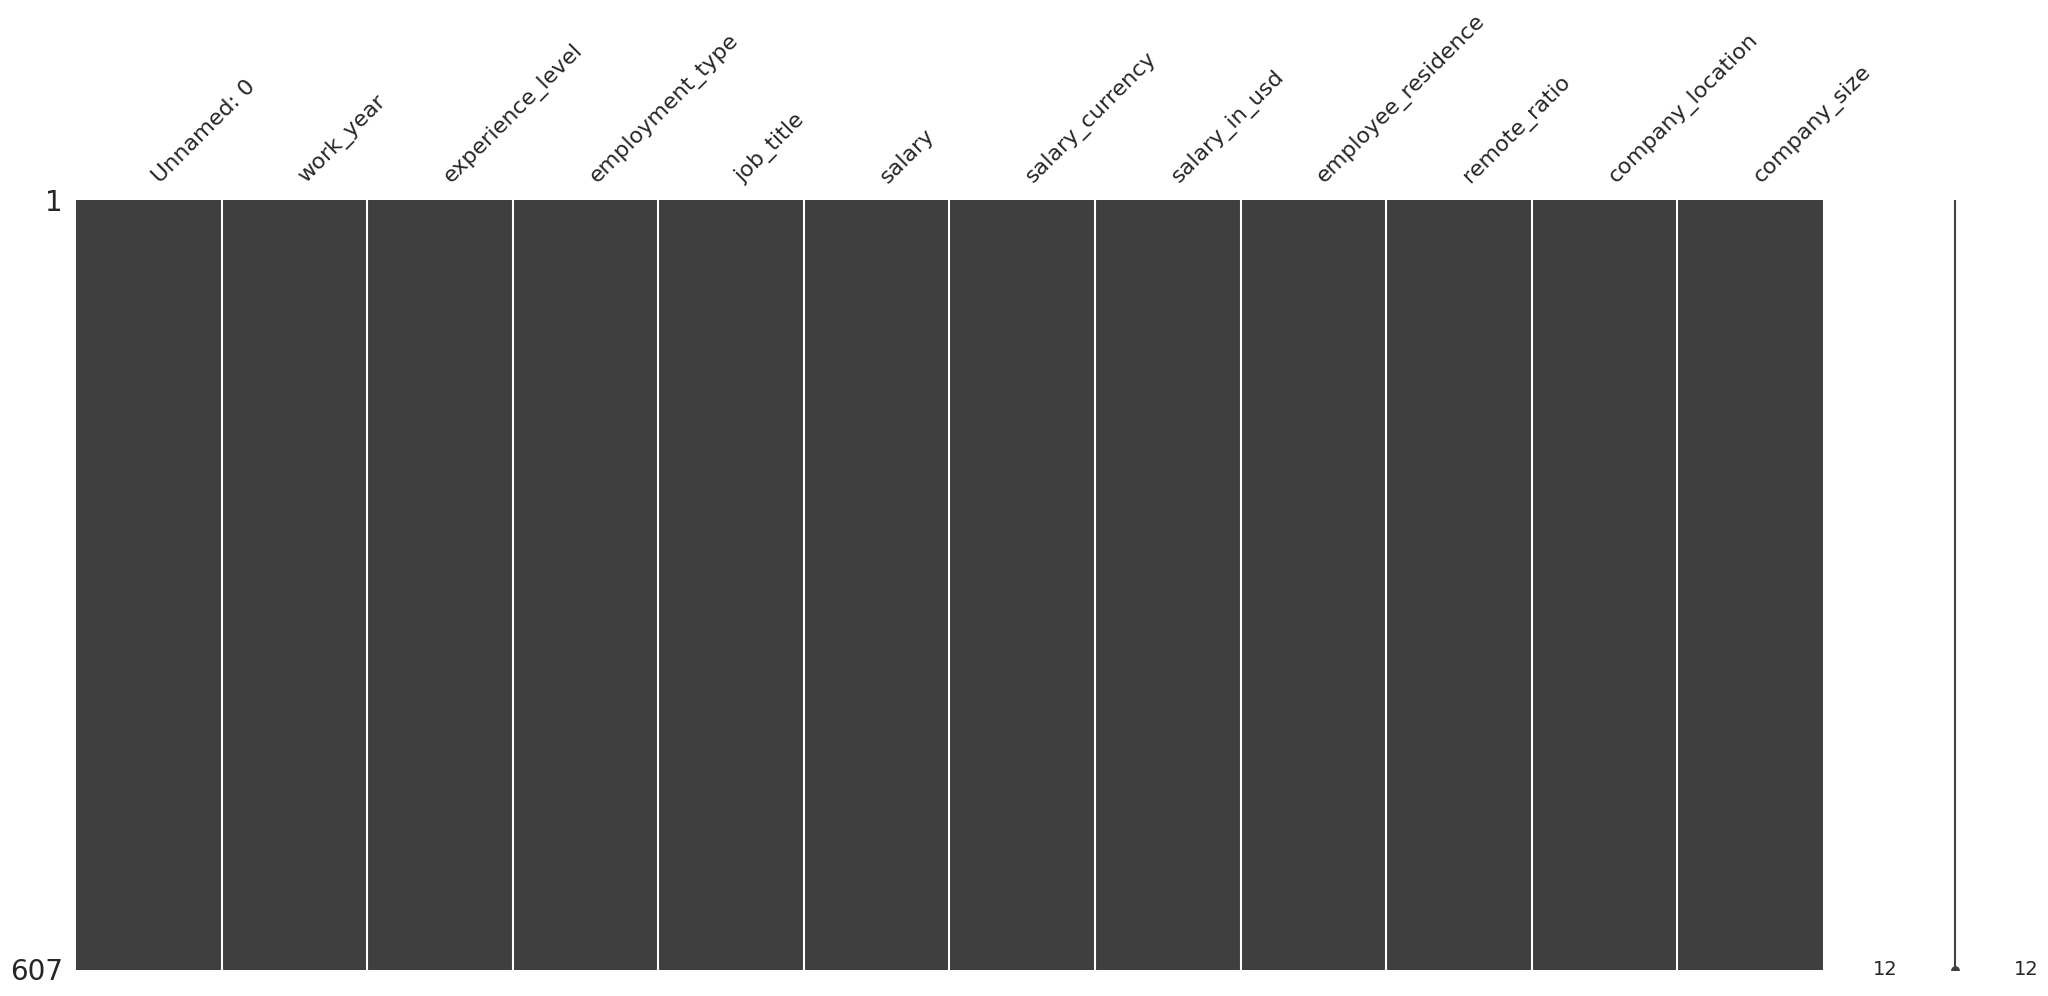

In [161]:
# Missing data
msno.matrix(df)

There is no missing data

## 2.3 Check Duplicate Values

In [162]:
# Looking for duplicated data
print("Number of duplicated data:", df.duplicated().sum())

Number of duplicated data: 0


There is no duplicate data in each row and column

## 2.4 Check Unique Values

In [163]:
# Check the number of unique values in each column
print("number of unique values in each column")
print(df.nunique())

number of unique values in each column
Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64


In [164]:
# Check the number of unique values in each column
print("number of unique values in each column")
for column in df.columns:
    print(f"{column}:")
    print(df[column].unique())

number of unique values in each column
Unnamed: 0:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


## 2.5 Change Data Type

In [165]:
df_copy = df.copy

In [166]:
# Change remote_ratio data type to string
df['remote_ratio'] = df['remote_ratio'].astype(str)

Change int64 int to string (object)

## 2.6 Transform Value Column

In [167]:
# Changing the value category of several columns
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['employee_residence'] = df['employee_residence'].astype('category')
df['remote_ratio'] = df['remote_ratio'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

# Recode values ​​in column 'experience_level'
df['experience_level'] = df['experience_level'].replace({
    "EN" : "Entry-level/Junior",
    "EX" : "Executive/Director",
    "MI" : "Mid-level/Intermediate",
    "SE" : "Senior-level/Expert"
})

# Recode value in 'employment_type' column
df['employment_type'] = df['employment_type'].replace({
    "CT" : "Contract-based employment",
    "FL" : "Freelance work",
    "FT" : "Full-time employment",
    "PT" : "Part-time employment"
})

# Recode value in 'company_location' column
df['company_location'] = df['company_location'].replace({
    "AR": "Argentina",
    "AT": "Austria",
    "AU": "Australia",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "BO": "Bolivia",
    "BR": "Brazil",
    "CA": "Canada",
    "CH": "Switzerland",
    "CL": "Chile",
    "CN": "China",
    "CO": "Colombia",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DK": "Denmark",
    "DZ": "Algeria",
    "EE": "Estonia",
    "ES": "Spain",
    "FR": "France",
    "GB": "United Kingdom",
    "GR": "Greece",
    "HK": "Hong Kong",
    "HN": "Honduras",
    "HR": "Croatia",
    "HU": "Hungary",
    "IE": "Ireland",
    "IN": "India",
    "IQ": "Iraq",
    "IR": "Iran",
    "IT": "Italy",
    "JE": "Jersey",
    "JP": "Japan",
    "KE": "Kenya",
    "LU": "Luxembourg",
    "MD": "Moldova",
    "MT": "Malta",
    "MX": "Mexico",
    "MY": "Malaysia",
    "NG": "Nigeria",
    "NL": "Netherlands",
    "NZ": "New Zealand",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PR": "Puerto Rico",
    "PT": "Portugal",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russia",
    "SG": "Singapore",
    "SI": "Slovenia",
    "TN": "Tunisia",
    "TR": "Turkey",
    "UA": "Ukraine",
    "US": "United States",
    "VN": "Vietnam"
})

# Recode value in 'company_size' column
df['company_size'] = df['company_size'].replace({
    "L" : "Large",
    "M" : "Medium",
    "S" : "Small"
})

# Recode value in 'remote_ratio' column
df['remote_ratio'] = df['remote_ratio'].replace({
    "0" : "Fully On-Site",
    "50" : "Hybrid ",
    "100" : "Fully Remote"
})

# Recode value in 'employee_residence' column
df['employee_residence'] = df['employee_residence'].replace({
    "AR": "Argentina",
    "AT": "Austria",
    "AU": "Australia",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "BO": "Bolivia",
    "BR": "Brazil",
    "CA": "Canada",
    "CH": "Switzerland",
    "CL": "Chile",
    "CN": "China",
    "CO": "Colombia",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DK": "Denmark",
    "DZ": "Algeria",
    "EE": "Estonia",
    "ES": "Spain",
    "FR": "France",
    "GB": "United Kingdom",
    "GR": "Greece",
    "HK": "Hong Kong",
    "HN": "Honduras",
    "HR": "Croatia",
    "HU": "Hungary",
    "IE": "Ireland",
    "IN": "India",
    "IQ": "Iraq",
    "IR": "Iran",
    "IT": "Italy",
    "JE": "Jersey",
    "JP": "Japan",
    "KE": "Kenya",
    "LU": "Luxembourg",
    "MD": "Moldova",
    "MT": "Malta",
    "MX": "Mexico",
    "MY": "Malaysia",
    "NG": "Nigeria",
    "NL": "Netherlands",
    "NZ": "New Zealand",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PR": "Puerto Rico",
    "PT": "Portugal",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russia",
    "SG": "Singapore",
    "SI": "Slovenia",
    "TN": "Tunisia",
    "TR": "Turkey",
    "UA": "Ukraine",
    "US": "United States",
    "VN": "Vietnam"
})

# Recode value in 'company_size' column
df['company_size'] = df['company_size'].replace({
    "L" : "Large",
    "M" : "Medium",
    "S" : "Small"
})

print(df.head())

   Unnamed: 0  work_year        experience_level       employment_type  \
0           0       2020  Mid-level/Intermediate  Full-time employment   
1           1       2020     Senior-level/Expert  Full-time employment   
2           2       2020     Senior-level/Expert  Full-time employment   
3           3       2020  Mid-level/Intermediate  Full-time employment   
4           4       2020     Senior-level/Expert  Full-time employment   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence   remote_ratio company_location company_size  
0            Germany  Fully On-Site          Germany  

<ipython-input-167-f27670ebb0ad>:10: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

<ipython-input-167-f27670ebb0ad>:18: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

<ipython-input-167-f27670ebb0ad>:26: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

<ipython-input-167-f27670ebb0ad>:86: FutureWarning:

The behavior of Series.replace (and DataFrame.replace

## 2.7 Add New Column

Determining Salary Category and Range
- **Low :** 4,000 - 50.000
- **Medium :** 50.001 - 150.000
- **High :** 150.001 - 500.000
- **Very High :** >500.000

In [168]:
# Add new column 'salary_catagory' based on column 'salary'
values = df['salary'].values

# Simulate a new DataFrame for salary categories
data = {'salary': values}
df_salary_cat = pd.DataFrame(data)

# Function to categorize salaries
def get_salary_category(salary):
    if 4000 <= salary <= 50000:
        return 'Low'
    elif 50001 <= salary <= 150000:
        return 'Medium'
    elif 150001 <= salary <= 500000:
        return 'High'
    else:
        return 'Very High'

# Add the 'salary_category' column to the new DataFrame
df_salary_cat['salary_category'] = df_salary_cat['salary'].apply(get_salary_category)

# Add the new column to the original DataFrame
df['salary_category'] = df_salary_cat['salary_category']

print(df)

     Unnamed: 0  work_year        experience_level       employment_type  \
0             0       2020  Mid-level/Intermediate  Full-time employment   
1             1       2020     Senior-level/Expert  Full-time employment   
2             2       2020     Senior-level/Expert  Full-time employment   
3             3       2020  Mid-level/Intermediate  Full-time employment   
4             4       2020     Senior-level/Expert  Full-time employment   
..          ...        ...                     ...                   ...   
602         602       2022     Senior-level/Expert  Full-time employment   
603         603       2022     Senior-level/Expert  Full-time employment   
604         604       2022     Senior-level/Expert  Full-time employment   
605         605       2022     Senior-level/Expert  Full-time employment   
606         606       2022  Mid-level/Intermediate  Full-time employment   

                      job_title  salary salary_currency  salary_in_usd  \
0            

## 2.7 Delete Irrelevant Column

Deleted Unnamed columb

In [169]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

In [170]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1AAoAvbHW5p6ysXGrgf6CGNatUbECZwlOmyRLVQSYS1Q#gid=0


# 3.EXPLORE DATA ANALYSIS

## 3.1 Correlation Heatmap of Numeric Column

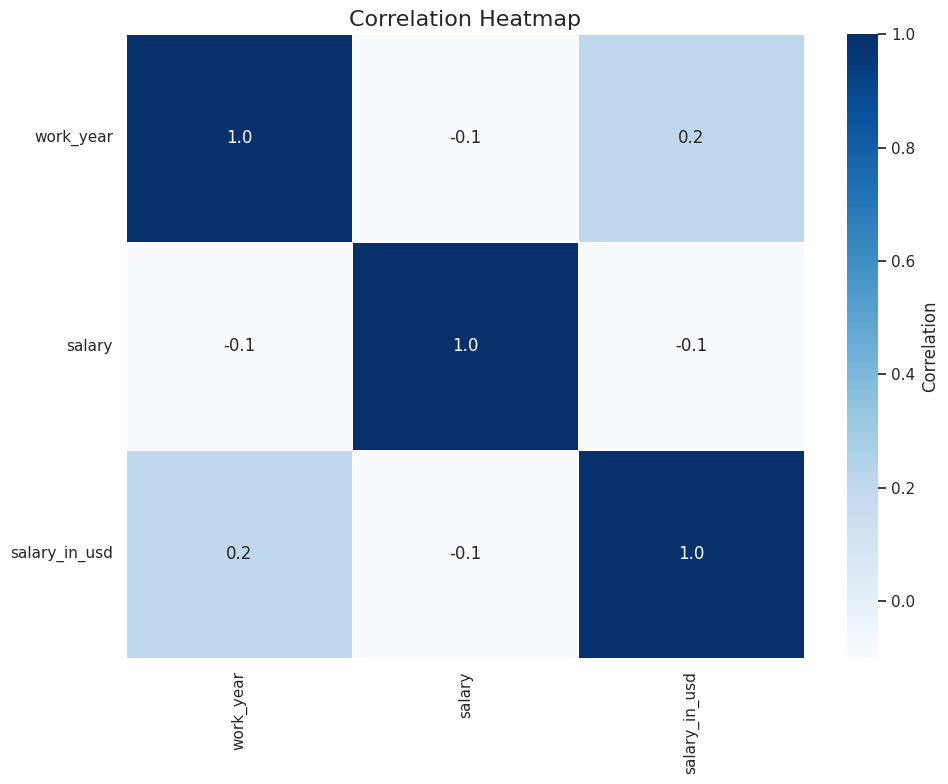

In [171]:
# 1.Numeric column selection
df_is_numeric = df.select_dtypes(include=[np.number])

# 2.Calculate the correlation
df_heatmap = df_is_numeric.corr().round(1)

# 3.Change to long format for visualization
df_heatmap_melted = df_heatmap.reset_index().melt(id_vars='index')
df_heatmap_melted.columns = ['X1', 'X2', 'value']

# 4.Visualisasi Heatmap dengan seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_heatmap,
    annot=True,
    cmap="Blues",
    fmt=".1f",
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)

# 5.Add title and label
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

- Salary Positively Correlated with Years of Service: In general, the longer a person has been working, the higher their salary. However, this relationship is not very strong, perhaps because other factors such as experience, skills, and position also play a role.

- No Significant Correlation between Salary and Remote Work Ratio: While there is a slight negative trend, the relationship between salary and remote work ratio is very weak. This suggests that salary is not significantly affected by whether someone works from home or in the office.
Unnamed: 0 Most Likely Index:

## 3.2 Specific Correlations in the Remote Ratio

<ipython-input-176-52b059ad9cf7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-176-52b059ad9cf7>:3: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



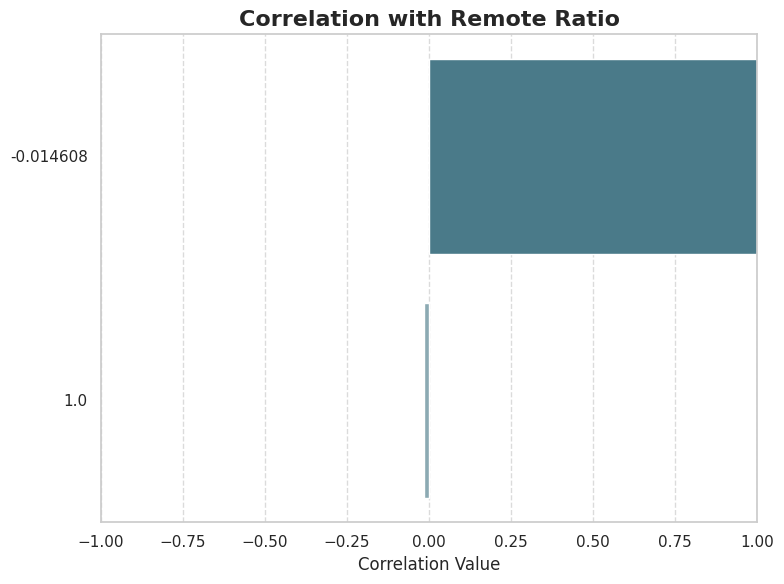

In [176]:
# Correlation visualization with remote_ratio
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_ratcorr,
    x='remote_ratio',
    y='salary',
    palette=sns.diverging_palette(220, 20, as_cmap=False),
    orient='h'
)

# Adding limits, labels, and formats
plt.xlim(-1, 1)
plt.title("Correlation with Remote Ratio", fontsize=16, weight='bold')
plt.xlabel("Correlation Value", fontsize=12)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

There is little impact of remote working on salary and the remote ratio does not significantly affect the salary amount

## 3.3 Work Year

<ipython-input-177-6a5afae1cd18>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




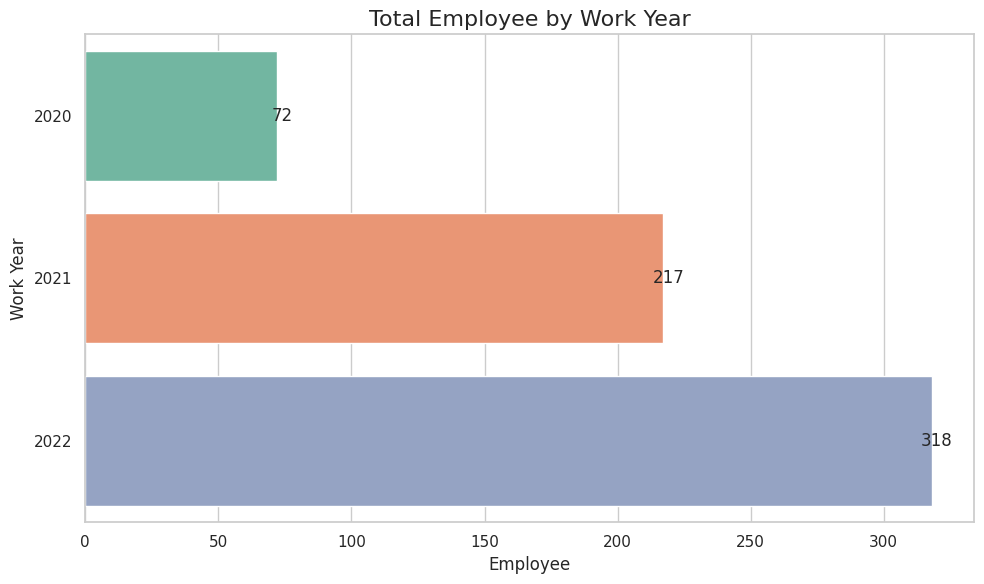

In [177]:
# Plot count chart for 'work_year'
sns.set(style="whitegrid")

# Create the count plot for 'work_year'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='work_year', palette='Set2')

# Title and labels
plt.title('Total Employee by Work Year', fontsize=16)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Work Year', fontsize=12)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

There is growth in the number of employees every year with an increase

## 3.4 Experience Level

<ipython-input-178-57056a1f48e6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




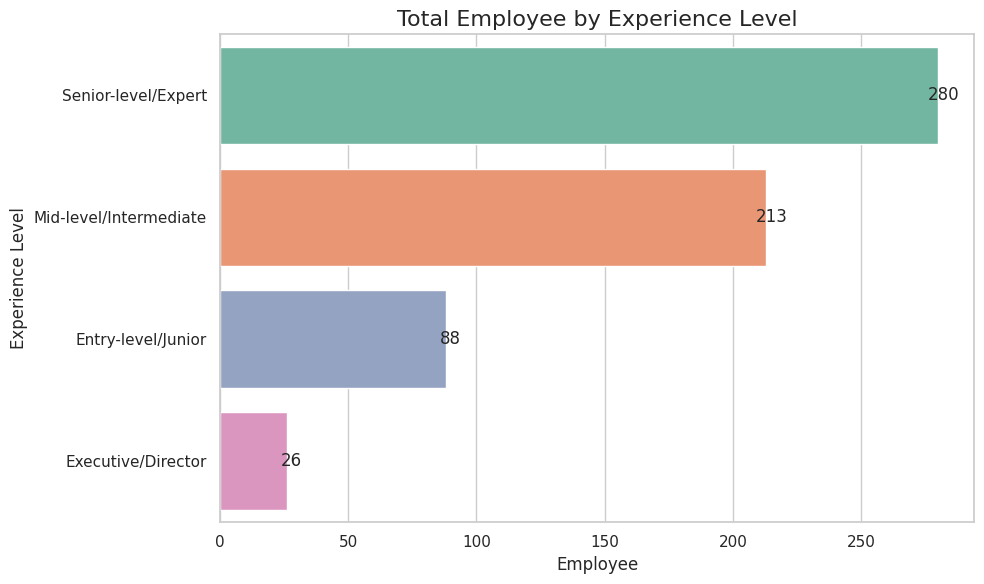

In [178]:
# Plot count chart for 'experience_level'
sns.set(style="whitegrid")

# Calculate the counts for 'experience_level' and sort them
experience_level_counts = df['experience_level'].value_counts().index

# Create the count plot for 'experience_level' sorted by count
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='experience_level', palette='Set2', order=experience_level_counts)

# Title and labels
plt.title('Total Employee by Experience Level', fontsize=16)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Experience Level', fontsize=12)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

## 3.5 Experience Level Across Work Years

<ipython-input-180-f1c0c57c917d>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False`

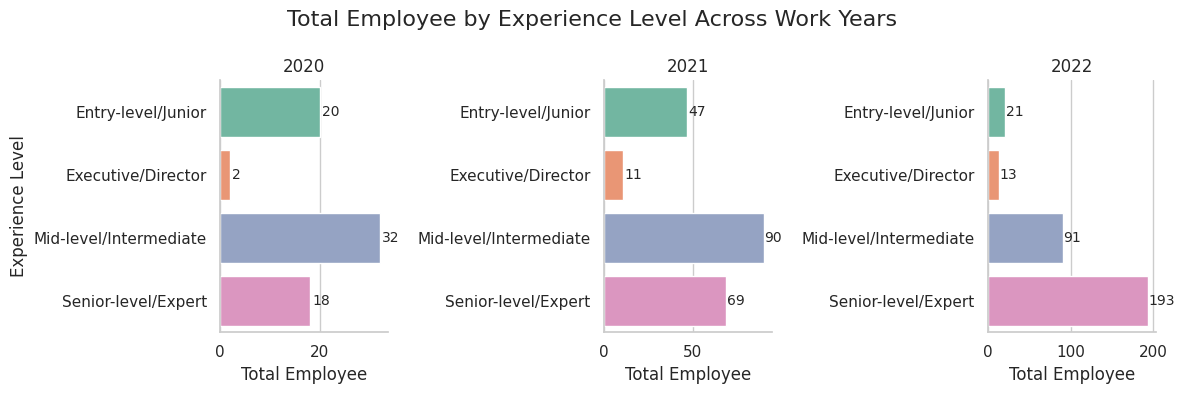

In [180]:
# Grouping data by 'experience_level' and 'work_year'
grouped_data = df.groupby(['experience_level', 'work_year']).size().reset_index(name='count')

# Create a separate plot for each work_year
g = sns.FacetGrid(data=grouped_data, col="work_year", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.barplot, "count", "experience_level", order=grouped_data['experience_level'].unique(), palette="Set2")

# Added title and fixed layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Total Employee", "Experience Level")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Total Employee by Experience Level Across Work Years", fontsize=16)

# Annotate each bar with the value
for ax in g.axes.flatten():
    if ax:  # Check if the subplot exists
        for p in ax.patches:
            # Annotate count values at the end of each bar
            ax.annotate(f'{int(p.get_width())}',
                        (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                        ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


- 2020 : Mid-level/Intermediate is the most
- 2021 : Mid-level/Intermediate is the most
- 2022 : Senior-level/Expert is the most

Senior-Level/Expert is the most Experience Level

<ipython-input-181-767100fb3e93>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




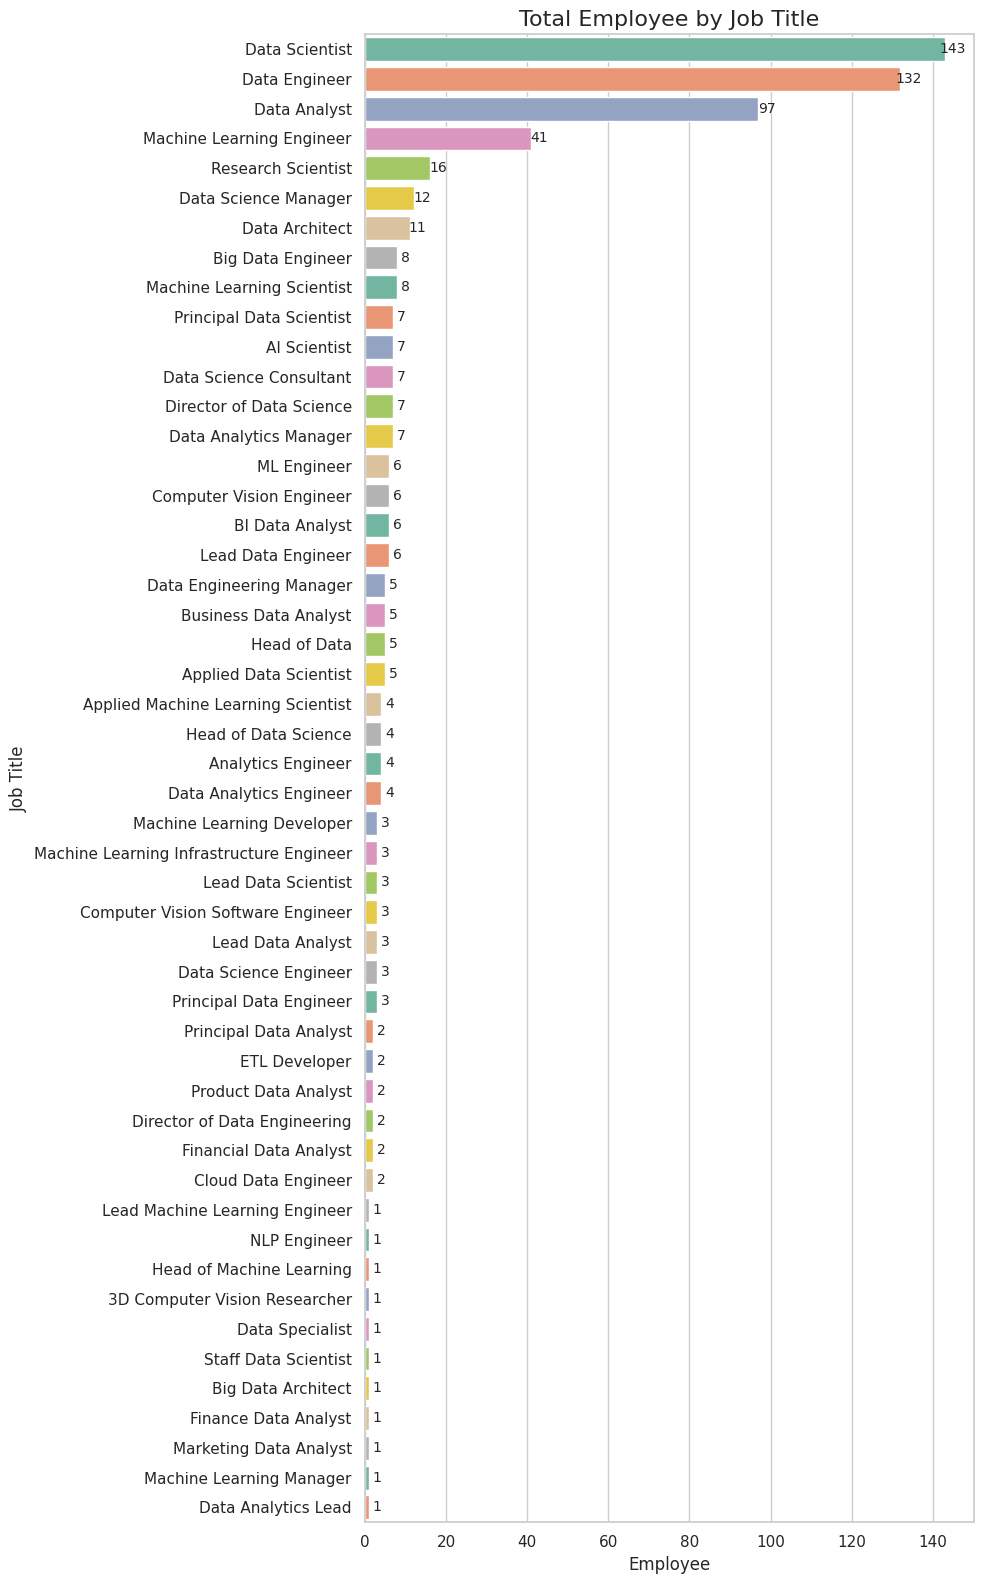

In [181]:
# Plot count chart for 'job_title'
sns.set(style="whitegrid")

# Calculate the counts for 'job_title' and sort them
job_title_counts = df['job_title'].value_counts().index

# Create the count plot for 'job_title' sorted by count
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=df, y='job_title', palette='Set2', order=job_title_counts)

# Title and labels
plt.title('Total Employee by Job Title', fontsize=16)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

The majority of employees have the most job titles in the **data field** where the top 3 are:
- **Data Scientist:** 143
- **Data Engineer:** 132
- **Data Analyst:** 97

## 3.6 Eemployee Residence

<ipython-input-184-a8f4cdb7825e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




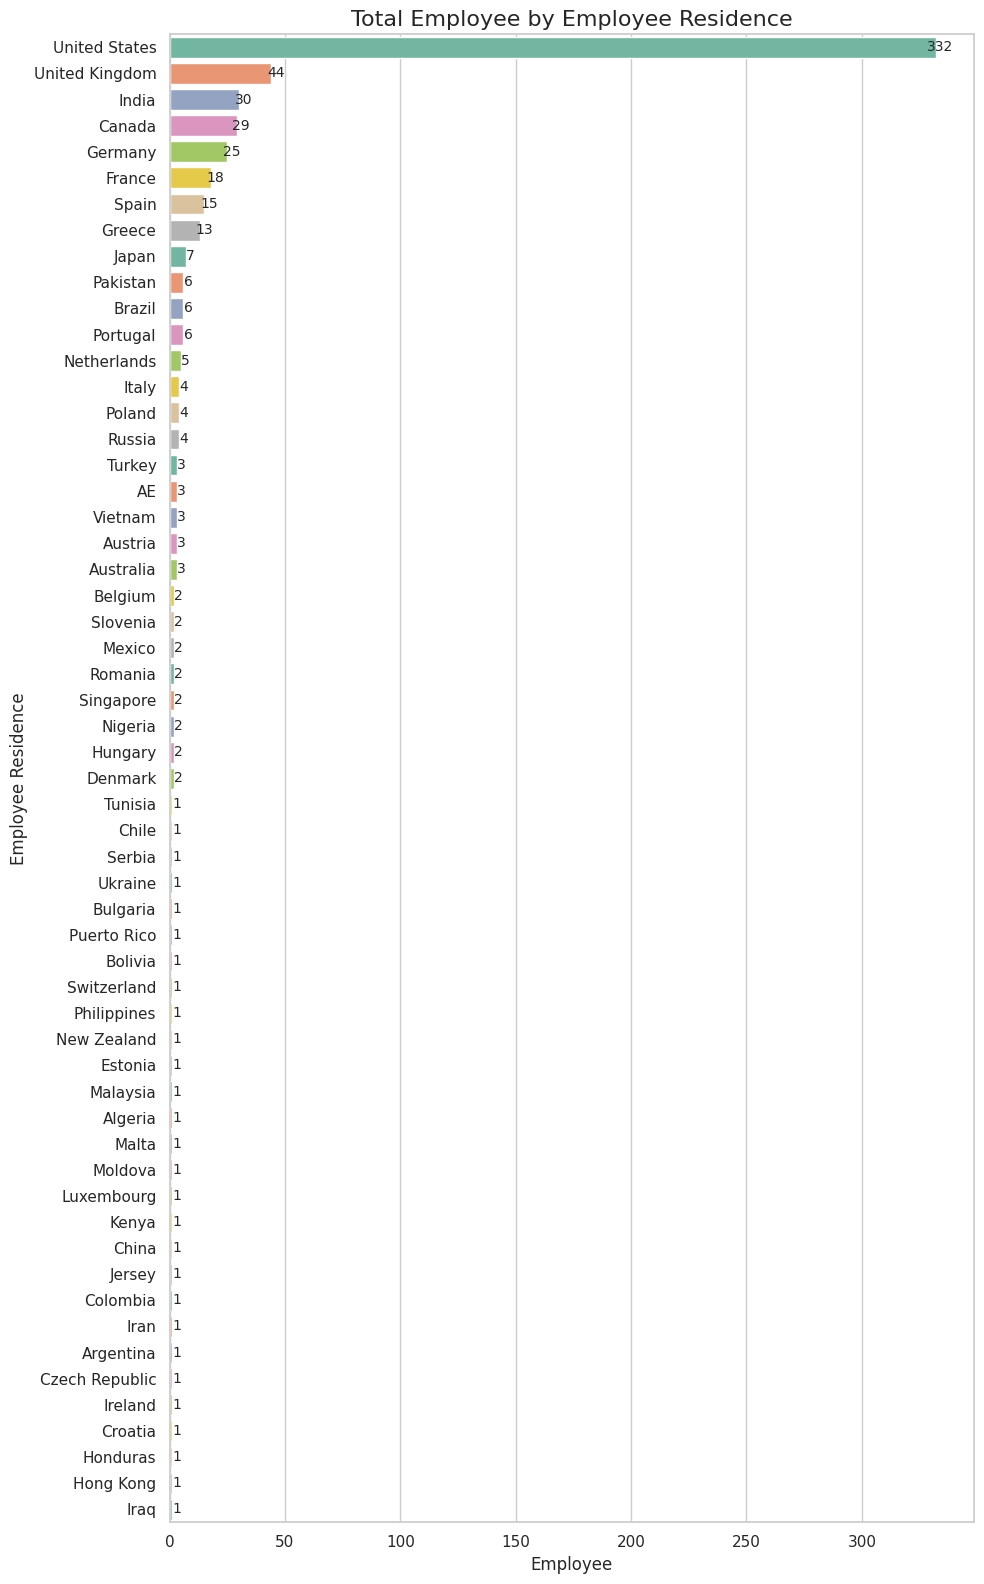

In [184]:
# Plot count chart for 'employee_residence'
sns.set(style="whitegrid")

# Calculate the counts for 'employee_residence' and sort them
employee_residence_counts = df['employee_residence'].value_counts().index

# Create the count plot for 'employee_residence' sorted by count
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=df, y='employee_residence', palette='Set2', order=employee_residence_counts)

# Title and labels
plt.title('Total Employee by Employee Residence', fontsize=16)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Employee Residence', fontsize=12)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

The United States is the country with the most employee residences at 332

## 3.7 Company Location

<ipython-input-185-b4c01fdf9f6a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




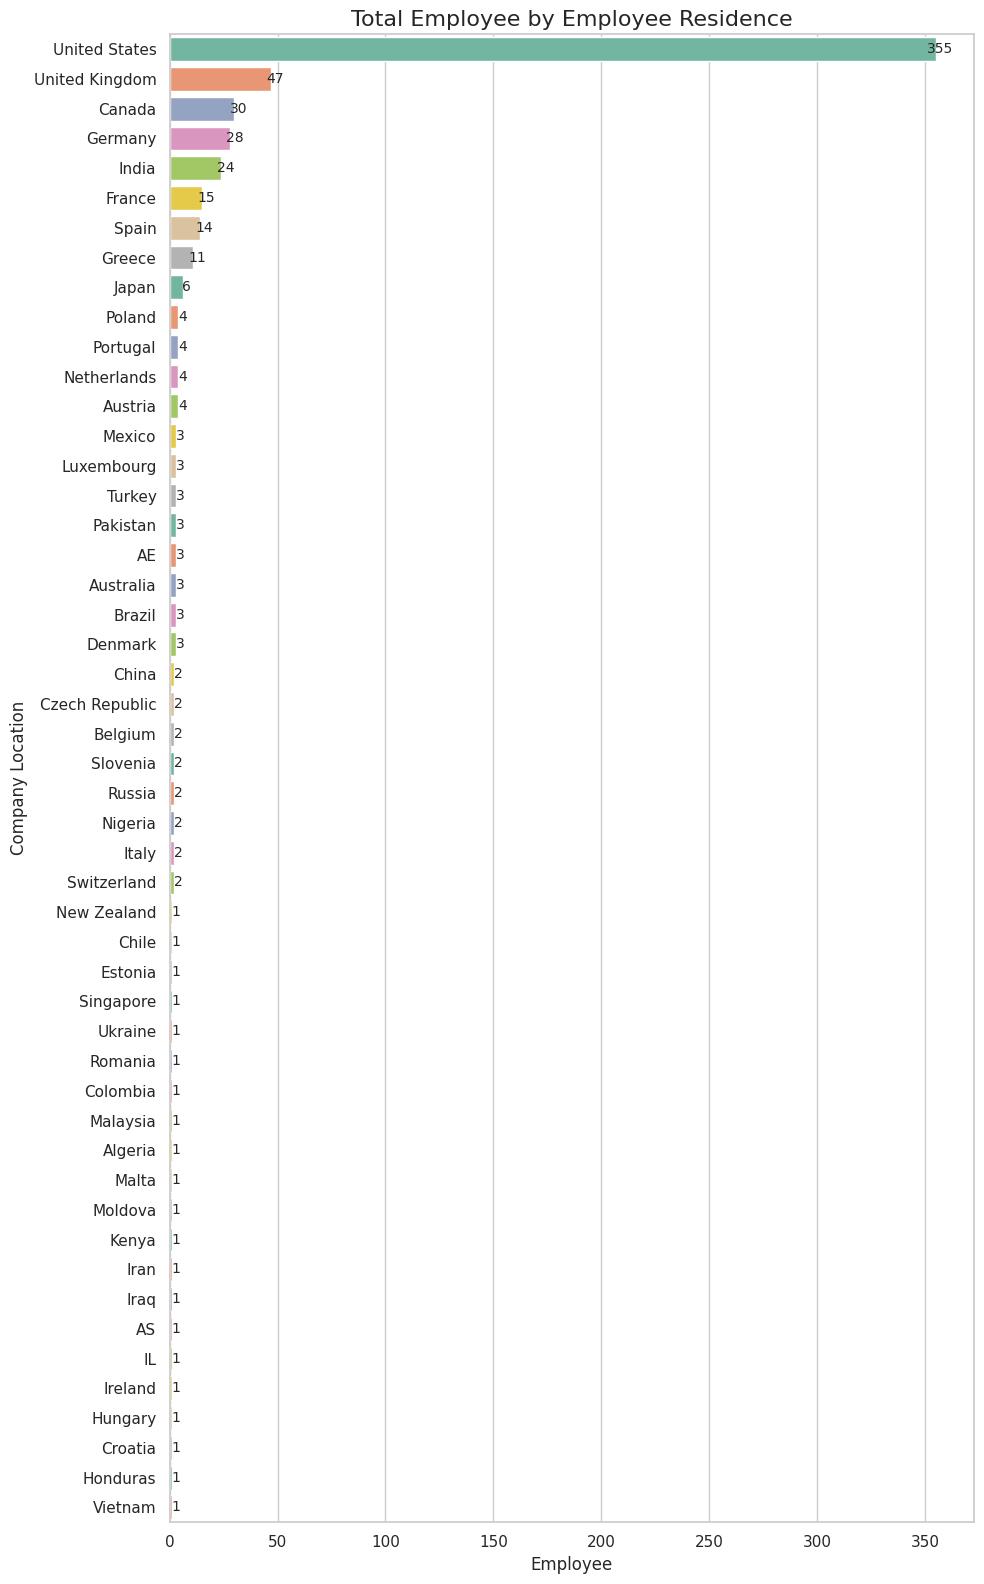

In [185]:
# Plot count chart for 'company_location'
sns.set(style="whitegrid")

# Calculate the counts for 'company_location' and sort them
company_location_counts = df['company_location'].value_counts().index

# Create the count plot for 'employee_residence' sorted by count
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=df, y='company_location', palette='Set2', order=company_location_counts)

# Title and labels
plt.title('Total Employee by Employee Residence', fontsize=16)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Company Location', fontsize=12)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

The United States is the country with the most company location at 355

## 3.8 Company Size

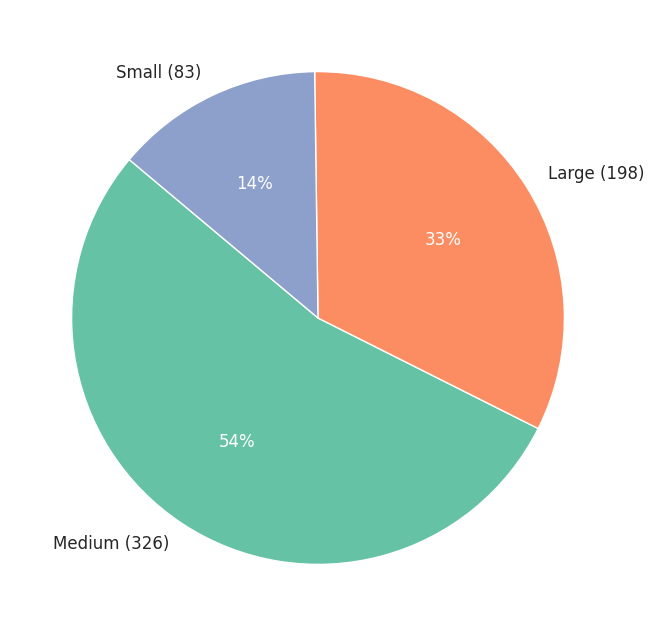

In [186]:
# Calculate the amount for each category 'company_size'
size_counts = df['company_size'].value_counts()

sizes = size_counts.values
labels = size_counts.index
colors = plt.cm.Set2.colors

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=[f'{label} ({size})' for label, size in zip(labels, sizes)],
    autopct='%1.0f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

Medium is the sclae with the most company size at 227 (54%)

## 3.9 Remote Ratio

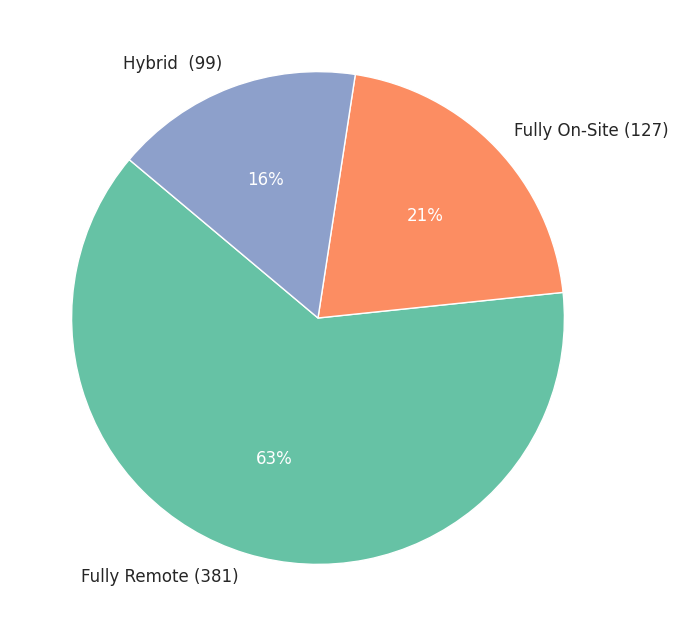

In [187]:
# Calculate the amount for each category 'remote_ratio'
size_counts = df['remote_ratio'].value_counts()

sizes = size_counts.values
labels = size_counts.index
colors = plt.cm.Set2.colors

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=[f'{label} ({size})' for label, size in zip(labels, sizes)],
    autopct='%1.0f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

Fully Remote is the most common type of work, amounting to 381 (63%) of the total jobs

## 3.10 Yearly Salary Trends

In [188]:
!pip install plotly
import plotly.express as px

# Calculate the median salary for each work year
monthly_trends = df.groupby('work_year')['salary'].median().reset_index()

# labels for the x-axis, title, and customized height
fig_monthly_trends = px.line(
    monthly_trends,
    x='work_year',
    y='salary',
    labels={'work_year': 'Year', 'salary': 'Salary'},
    title='Yearly Salary Trends',
    height=650
)

# Display the plot
fig_monthly_trends.show()

There has been a drastic increase in salary from 2021 to 2022

## 3.11 Salary Trends by Job Title

In [189]:
# Calculate the sum of salaries for each job title
monthly_trends = df.groupby('job_title')['salary'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: Job titles, y-axis: Sum of salaries,
# labels for the x-axis, title, and customized height
fig_monthly_trends = px.line(
    monthly_trends,  # DataFrame containing the data
    x='job_title',   # x-values: job titles
    y='salary',  # y-values: sum of salaries
    labels={'job_title': 'Job', 'salary': 'Salary'},  # Customize label for the x-axis
    title='Salary Trends by Job',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_monthly_trends.show()

Data Scientist is the job title with the highest salary trend

## 3.12 Salary Catagory

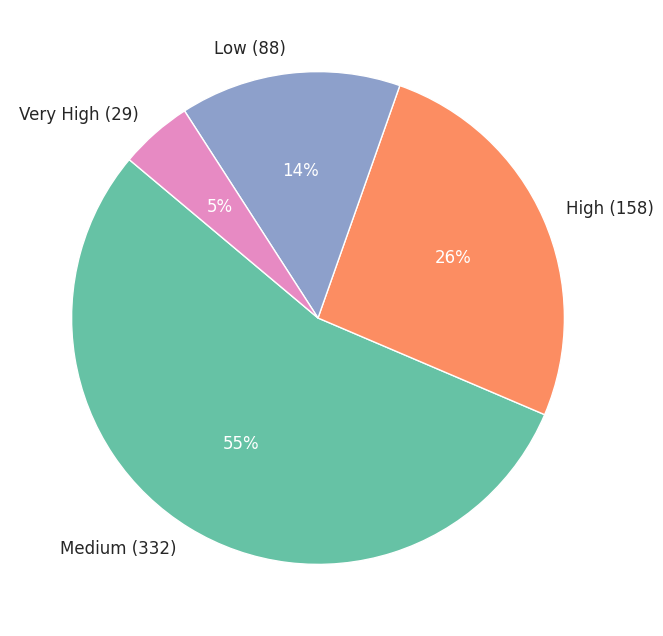

In [190]:
# Calculate the amount for each category 'salary_catagory'
size_counts = df['salary_category'].value_counts()

sizes = size_counts.values
labels = size_counts.index
colors = plt.cm.Set2.colors

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=[f'{label} ({size})' for label, size in zip(labels, sizes)],
    autopct='%1.0f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

The majority of employees with a Medium salary category with a range of 50,001 - 150,000 are 332 employees (55%)

## 3.13 Word Cloud Of Job Title

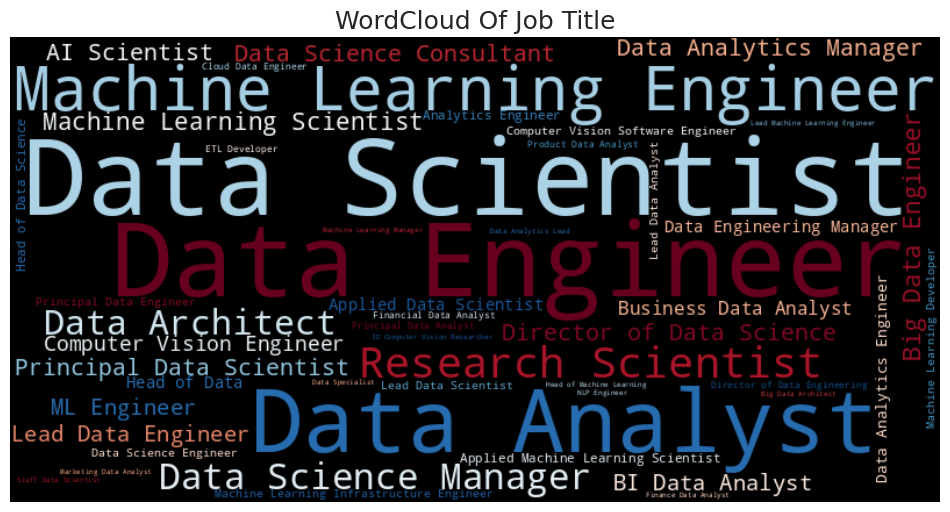

In [191]:
# Creating a frequency dataframe
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    return df_freq.reset_index()

freq_df = Freq_df(df['job_title'].values.tolist())

# Convert to dictionary for WordCloud
data = freq_df.set_index('Term')['Frequency'].to_dict()

def Word_Cloud(data, background_color, colormap, title):
    wc = WordCloud(
        background_color=background_color,
        colormap=colormap,
        width=800,
        height=400
    ).generate_from_frequencies(data)

    plt.figure(figsize=(12,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

Word_Cloud(data, 'black', 'RdBu', 'WordCloud Of Job Title')

# 4.Conculsion

## 4.1 Insight

- Terjadi pertumbuhan jumlah pegawai setiap tahunnya dengan peningkatan paling banyak Mid-level/Intermediate (2020), Mid-level/Intermediate (2021) dan Senior-level/Expert (2022)
- Mayoritas pegawai memiliki jabatan terbanyak di bidang data dimana 3 teratas adalah Data Scientist (143), Data Engineer (132), Data Analyst (97)
Amerika Serikat merupakan negara dengan tempat tinggal pegawai terbanyak (332) dan lokasi perusahaan terbanyak (355)
- Medium merupakan skala dengan ukuran perusahaan terbanyak yaitu 227 (54%)
- Fully Remote merupakan jenis pekerjaan yang paling umum yaitu sebesar 381 (63%) dari total pekerjaan
- Terjadi peningkatan gaji yang cukup drastis dari tahun 2021 ke tahun 2022
Data Scientist merupakan jabatan dengan tren gaji tertinggi
- Mayoritas pegawai dengan kategori gaji Medium dengan kisaran 50.001 - 150.000 adalah 332 karyawan (55%)

## 4.2 Recommendation

- Implement mentoring or skills-based training programs that focus on improving technical and leadership competencies at senior levels.
- Provide facilities such as online gym subscriptions, virtual soft skills training, or remote collaboration platforms to increase employee engagement.
- Implement cloud-based management systems and AI technology to accelerate decision-making and manage employees more efficiently.
- Conduct more frequent recognition and reward programs for mid-salaried employees to maintain their motivation and retention.
- Implement technology that can monitor productivity transparently and fairly, and provide space for employees to provide feedback on their experiences working remotely.
- Develop a global recruitment strategy to increase diversity within the company, and introduce location flexibility policies to support international employees.